In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Making a dataframe to categorise the countries by FAO standards

In [2]:
#This will be used at a later stage
#fbs_df["Area"].unique()
countrygroups = pd.read_csv("FAOSTAT_data_5-7-2022.csv", encoding="latin-1")
countrygroups.columns=countrygroups.columns.str.replace(' ','_')
countrygroups = countrygroups[["Country_Group","Country"]]
cat =  [True for i in range(len(countrygroups))]
countrygroups["cat"] = cat

In [3]:
countrygroups.head()
#countrygroups.info()
# print(countrygroups.describe())
#countrygroups["Country_Group"].unique()

,Country_Group,Country,cat
0,Africa,Algeria,True
1,Africa,Algeria,True
2,Africa,Angola,True
3,Africa,Angola,True
4,Africa,Benin,True


In [4]:
countrygroups = countrygroups.drop_duplicates()

In [5]:
pd.pivot(countrygroups, index="Country", columns="Country_Group", values="cat")

Country_Group,Africa,Americas,Annex I countries,Antarctic Region,Asia,Australia and New Zealand,Caribbean,Caucasus and Central Asia,Central America,Central Asia,...,Southern Europe,Sub-Saharan Africa,Sub-Saharan Africa (including Sudan),Upper-middle-income economies,Western Africa,Western Asia,"Western Asia (exc. Armenia, Azerbaijan, Cyprus, Israel and Georgia)",Western Asia and Northern Africa,Western Europe,World
Country,,,,,,,,,,,,,,,,,,,,,
?land Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
Afghanistan,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,True
Algeria,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,True
American Samoa,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen Ar Rp,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True
Yemen Dem,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True
Yugoslav SFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [6]:
## The UN also has a standardised classification system called the geoscheme, but the FAO classifications seem to closely
## follow the geoscheme, and the small differences between them made using the UN geoscheme very labour-intensive. That is
## why I switched to the above method. This is simply kept in case it comes in handy.
# geoscheme = pd.read_csv("UNSD — Methodology.csv")
# geoscheme.columns=geoscheme.columns.str.replace(' ','_')
# geoscheme = geoscheme.sort_values(by = 'Country_or_Area')
# geoscheme["Country_or_Area"].unique()

# Setting up

In [7]:
#Food Balance sheet data. I commented out the use of the new data.
#fbs_df = pd.read_csv("FoodBalanceSheets_E_All_Data_(Normalized).csv", encoding="latin-1")
fbs_df = pd.read_csv("FoodBalanceSheetsHistoric_E_All_Data_(Normalized).csv", encoding="latin-1")

In [8]:
fbs_df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,2501,Population,511,Total Population - Both sexes,1961,1961,1000 persons,8954.0,NaN
1,2,Afghanistan,2501,Population,511,Total Population - Both sexes,1962,1962,1000 persons,9142.0,NaN
2,2,Afghanistan,2501,Population,511,Total Population - Both sexes,1963,1963,1000 persons,9340.0,NaN
3,2,Afghanistan,2501,Population,511,Total Population - Both sexes,1964,1964,1000 persons,9547.0,NaN
4,2,Afghanistan,2501,Population,511,Total Population - Both sexes,1965,1965,1000 persons,9765.0,NaN


In [9]:
fbs_df.columns=fbs_df.columns.str.replace(' ','_')

In [10]:
#These are the item codes of problematic items
eggsmilkmisc = [2949,2948,2928,2899]

In [11]:
fbs_df_order = fbs_df.sort_values(by = ['Area_Code', 'Item_Code','Element_Code',"Year_Code"])
# remove problematic items. Eggs, milk, and misc are doubled, as they are counted as "items" and "aggregates"
# with the same values
fbs_df_order = fbs_df_order[(fbs_df_order.Item_Code != 2949) & (fbs_df_order.Item_Code != 2948)
                            & (fbs_df_order.Item_Code != 2928) & (fbs_df_order.Item_Code != 2899)]
fbs_df_order = fbs_df_order.reset_index(drop=True)

In [12]:
# The old data uses "Groundnuts (Shelled Eq)" while the new uses "Groundnuts".
# So I can simply switch between the different datasets, I am fixing this.
fbs_df_order["Item"] = fbs_df_order["Item"].apply(lambda x: x.replace("Groundnuts (Shelled Eq)", "Groundnuts"))

In [13]:
# The df has over 110 million cells! I'll have to use very efficient code when working with this.
print(fbs_df_order.info())
print(fbs_df_order.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11117708 entries, 0 to 11117707
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Area_Code     int64  
 1   Area          object 
 2   Item_Code     int64  
 3   Item          object 
 4   Element_Code  int64  
 5   Element       object 
 6   Year_Code     int64  
 7   Year          int64  
 8   Unit          object 
 9   Value         float64
 10  Flag          object 
dtypes: float64(1), int64(5), object(5)
memory usage: 933.0+ MB
None
          Area_Code     Item_Code  Element_Code     Year_Code          Year  \
count  1.111771e+07  1.111771e+07  1.111771e+07  1.111771e+07  1.111771e+07   
mean   1.232124e+03  2.687885e+03  3.714450e+03  1.987694e+03  1.987694e+03   
std    2.146956e+03  1.429577e+02  2.273880e+03  1.535452e+01  1.535452e+01   
min    1.000000e+00  2.501000e+03  5.110000e+02  1.961000e+03  1.961000e+03   
25%    7.900000e+01  2.562000e+03  6.740000e+02  1.974000e+03  1.97400

In [14]:
fbs_df_order.head()

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year_Code,Year,Unit,Value,Flag
0,1,Armenia,2501,Population,511,Total Population - Both sexes,1992,1992,1000 persons,3449.0,NaN
1,1,Armenia,2501,Population,511,Total Population - Both sexes,1993,1993,1000 persons,3370.0,NaN
2,1,Armenia,2501,Population,511,Total Population - Both sexes,1994,1994,1000 persons,3290.0,NaN
3,1,Armenia,2501,Population,511,Total Population - Both sexes,1995,1995,1000 persons,3223.0,NaN
4,1,Armenia,2501,Population,511,Total Population - Both sexes,1996,1996,1000 persons,3173.0,NaN


# Adding the population to each row

In [15]:
# Get the population of every country for every year
fbs_pops = pd.pivot_table(fbs_df_order, index=["Area","Year_Code"], columns="Item", values="Value", aggfunc=np.mean)
# in code deleted for tidiness, I confirmed that this df was equal to one where aggfunc=np.sum.
# this was to be sure there were not double entries that could mess up the analysis
fbs_pops = fbs_pops.reset_index()
fbs_pops.columns=fbs_pops.columns.str.replace(' ','_')

In [16]:
fbs_pops = fbs_pops[["Area","Year_Code","Population"]]

In [17]:
#"Total_Population_-_Both_sexes"

In [18]:
fbs_pops

Item,Area,Year_Code,Population
0,Afghanistan,1961,8954.0
1,Afghanistan,1962,9142.0
2,Afghanistan,1963,9340.0
3,Afghanistan,1964,9547.0
4,Afghanistan,1965,9765.0
...,...,...,...
10388,Zimbabwe,2009,12889.0
10389,Zimbabwe,2010,13077.0
10390,Zimbabwe,2011,13359.0
10391,Zimbabwe,2012,13724.0


In [19]:
# testing this way of finding the population based on the area and year
(fbs_pops.loc[(fbs_pops['Area'] == "Afghanistan") & (fbs_pops['Year_Code'] == 1967)])["Population"].iloc[0]

10222.0

In [20]:
# We'll be working with this pivot table for a while.
fbs_pivot_cal_to_tonne = pd.pivot(fbs_df_order, index=["Area","Year_Code","Item"], columns="Element", values="Value")
fbs_pivot_cal_to_tonne.columns=fbs_pivot_cal_to_tonne.columns.str.replace(' ','_')
fbs_pivot_cal_to_tonne = fbs_pivot_cal_to_tonne.reset_index()

In [21]:
def add_item(df, ref_df, item_name):
    # working with lists is far more efficient
    area = df["Area"].tolist()
    year = df["Year_Code"].tolist()
    # getting the item value based on area and year
    itemvaluetemp = ref_df.loc[((ref_df['Area'] == area[0]) & (ref_df['Year_Code'] == year[0]), item_name)].iloc[0]
    itemvalue = [itemvaluetemp]
    for i in range(1,len(area)):
        # retrieving the value based is slow, so I only retrieve it when the area and year changes.
        # because the df is ordered by area and year, this is about 100 times faster
        if (area[i] == area[i-1]) and (year[i] == year[i-1]):
            itemvalue.append(itemvaluetemp)
        else:
            itemvaluetemp = ref_df.loc[((ref_df['Area'] == area[i]) & (ref_df['Year_Code'] == year[i]), item_name)].iloc[0]
            itemvalue.append(itemvaluetemp)
    return itemvalue

In [22]:
pop_list = add_item(fbs_pivot_cal_to_tonne, fbs_pops, "Population")
fbs_pivot_cal_to_tonne["pop"] = pop_list

In [23]:
# This is a relatively straightforward and much more efficient function to add the population to each row,
# but I could not fix a bug that resulted in 113 missing numbers - may revisit
# def add_pop(df):
#     area = df["Area"].tolist()
#     year = df["Year_Code"].tolist()
#     item = df["Item"].tolist()
#     population = df["Population"].tolist()
#     pop = []
#     multiplier = 1
#     temparea = ""
#     tempyear = 0
#     for i in range(0,(len(item) - 1)):
#         if item[i] < item[i+1]:
#             multiplier = multiplier + 1
#             if item[i] == "Population" and ((area[i] != temparea) or (year[i] != tempyear)):
#                 temppop = population[i]
#                 temparea = area[i]
#                 tempyear = year[i]
#             elif item[i] == "Population" and area[i] == temparea and year[i] == tempyear:
#                 temppop = np.nan
#         else:
#             pop += multiplier * [temppop]
#             multiplier = 1
#     return pop

# Adding the total land area to each row

In [24]:
landuse_df = pd.read_csv("Inputs_LandUse_E_All_Data_(Normalized).csv", encoding="latin-1")
landuse_df.columns=landuse_df.columns.str.replace(' ','_')

In [25]:
landuse_df.head()

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year_Code,Year,Unit,Value,Flag
0,2,Afghanistan,6600,Country area,5110,Area,1961,1961,1000 ha,65286.0,W
1,2,Afghanistan,6600,Country area,5110,Area,1962,1962,1000 ha,65286.0,W
2,2,Afghanistan,6600,Country area,5110,Area,1963,1963,1000 ha,65286.0,W
3,2,Afghanistan,6600,Country area,5110,Area,1964,1964,1000 ha,65286.0,W
4,2,Afghanistan,6600,Country area,5110,Area,1965,1965,1000 ha,65286.0,W


In [26]:
# Get the area of every country for every year
totarea = pd.pivot_table(landuse_df, index=["Area","Year_Code"], columns="Item", values="Value")
totarea = totarea.reset_index()
totarea.columns=totarea.columns.str.replace(' ','_')
totarea = totarea[["Area","Year_Code","Land_area"]]

In [27]:
totarea.head()

Item,Area,Year_Code,Land_area
0,Afghanistan,1961,65223.0
1,Afghanistan,1962,65223.0
2,Afghanistan,1963,65223.0
3,Afghanistan,1964,65223.0
4,Afghanistan,1965,65223.0


In [28]:
#calling the function written above to add land area
area_list = add_item(fbs_pivot_cal_to_tonne, totarea, "Land_area")
fbs_pivot_cal_to_tonne["totarea"] = area_list

In [29]:
# This shows the junction between 2 areas to check that the new variables line up
# It's not a thorough test, but a handy way to spot the most glaring of flaws in the function
fbs_pivot_cal_to_tonne.head(4243)

Element,Area,Year_Code,Item,Domestic_supply_quantity,Export_Quantity,Fat_supply_quantity_(g/capita/day),Feed,Food,Food_supply_(kcal/capita/day),Food_supply_quantity_(kg/capita/yr),...,Losses,Other_uses_(non-food),Processing,Production,Protein_supply_quantity_(g/capita/day),Seed,Stock_Variation,Total_Population_-_Both_sexes,pop,totarea
0,Afghanistan,1961,Alcoholic Beverages,0.0,NaN,NaN,NaN,0.0,0.0,0.00,...,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,8954.00,65223.0
1,Afghanistan,1961,Animal Products,NaN,NaN,18.44,NaN,NaN,247.0,NaN,...,NaN,NaN,NaN,NaN,13.53,NaN,NaN,NaN,8954.00,65223.0
2,Afghanistan,1961,Animal fats,20.0,NaN,5.29,NaN,20.0,47.0,2.18,...,NaN,NaN,NaN,20.0,0.04,NaN,NaN,NaN,8954.00,65223.0
3,Afghanistan,1961,Apples and products,15.0,0.0,0.01,NaN,14.0,2.0,1.60,...,1.0,NaN,NaN,15.0,0.01,NaN,NaN,NaN,8954.00,65223.0
4,Afghanistan,1961,Bananas,0.0,NaN,0.00,NaN,0.0,0.0,0.00,...,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,8954.00,65223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4238,Afghanistan,2013,Wheat and products,5992.0,NaN,4.69,NaN,4895.0,1369.0,160.23,...,775.0,NaN,NaN,5169.0,36.91,322.0,-350.0,NaN,30552.00,65223.0
4239,Afghanistan,2013,Wine,0.0,NaN,NaN,NaN,0.0,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30552.00,65223.0
4240,Africa,1961,"Alcohol, Non-Food",1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,0.0,NaN,270510.68,2964906.5
4241,Africa,1961,Alcoholic Beverages,8862.0,1622.0,0.00,NaN,8436.0,38.0,31.18,...,300.0,86.0,40.0,10144.0,0.34,NaN,-60.0,NaN,270510.68,2964906.5


# Convert 1000tonnes to other indicators

In order to relate production to dietary indices, I need a means of converting the units of production, feed, seed, etc., 1000tonnes, to units that can be used with dietary indices. This will be kcal/capita/day, but I will also have a figure for the total dietary energy supply for the country. I will use (kcal/day)/1000. Therefore, I will calculate factors by which the production data can be multiplied. For the kcal/cal/day variable that I want to create, this factor will be calculated as food supply in kcal/capita/day divided by food supply in 1000 tonnes. By multiplying this factor by the population size in (1000s people), the factor for the country's total production is calculated.

I had hoped that these factors would only need to be calculated once per food item, but because of slight differences in the composition of each food item between countries and over time (e.g. the fish consumed in Ireland may be different to fish consumed in Indonesia), both of these factors had to be calculated for every country * year * food item.

We will see below how the values of the factor are distributed. Initially I had hoped that the variance would be so low that I could universalise the mean or median for each food item. But the distributions varied significantly between food items, with a couple even being bimodal!

In [30]:
def cal_to_tonne(df):
    foodtonne = df["Food"].tolist()
    foodcal = df["Food_supply_(kcal/capita/day)"].tolist()
    popul = df["pop"].tolist()
    area = df["totarea"].tolist()
    ratiostotal = []
    ratiospercap = []
    ratiosperarea = []
    for i in range(0,len(foodtonne)):
        if (foodtonne[i] > 0) and (foodcal[i] > 0):
            ratiospercap.append(foodcal[i] / foodtonne[i])
            ratiostotal.append((foodcal[i] * popul[i]) / foodtonne[i])
            ratiosperarea.append((foodcal[i] * popul[i]) / (foodtonne[i] * area[i]))            
        else:
            ratiospercap.append(np.nan)
            ratiostotal.append(np.nan)
            ratiosperarea.append(np.nan)
    return ratiostotal, ratiospercap, ratiosperarea

In [31]:
ratiostotal, ratiospercap, ratiosperarea = cal_to_tonne(fbs_pivot_cal_to_tonne)

In [32]:
# Multiply a 1000tonne figure by ratiostotal to get the total energy for the area
# The units of ratiostotal are (1000kcal/day)/(1000tonnes)
# Multiply a 1000tonne figure by ratiospercap to get the total energy for the area
# The units of ratiospercap are (kcal/cap/day)/(1000tonnes)
# Multiply a 1000tonne figure by ratiosperarea to get the total energy per unit area
# The units of ratiosperarea are (1000kcal/day)/(1000tonnes * 1000ha)
fbs_pivot_cal_to_tonne["caltonrattotal"] = ratiostotal
fbs_pivot_cal_to_tonne["caltonratpercap"] = ratiospercap
fbs_pivot_cal_to_tonne["caltonratperarea"] = ratiosperarea

# Investigating the distributions of these factors

In [33]:
caltonratcalc_df = fbs_pivot_cal_to_tonne[["Area","Year_Code","Item","caltonrattotal","caltonratpercap","caltonratperarea"]]

In [34]:
caltonratcalc_df

Element,Area,Year_Code,Item,caltonrattotal,caltonratpercap,caltonratperarea
0,Afghanistan,1961,Alcoholic Beverages,NaN,NaN,NaN
1,Afghanistan,1961,Animal Products,NaN,NaN,NaN
2,Afghanistan,1961,Animal fats,21041.900000,2.350000,0.322615
3,Afghanistan,1961,Apples and products,1279.142857,0.142857,0.019612
4,Afghanistan,1961,Bananas,NaN,NaN,NaN
...,...,...,...,...,...,...
1157929,Zimbabwe,2013,Vegetables,685.682819,0.048458,0.017725
1157930,Zimbabwe,2013,"Vegetables, other",729.381443,0.051546,0.018854
1157931,Zimbabwe,2013,Vegetal Products,NaN,NaN,NaN
1157932,Zimbabwe,2013,Wheat and products,7761.738149,0.548533,0.200639


In [35]:
caltonratcalc_df = pd.pivot(caltonratcalc_df, index=["Area","Year_Code"], columns="Item", values="caltonratperarea")

In [36]:
caltonratcalc_df

Item                   Alcohol, Non-Food  Alcoholic Beverages  \
Area        Year_Code                                           
Afghanistan 1961                     NaN                  NaN   
            1962                     NaN                  NaN   
            1963                     NaN                  NaN   
            1964                     NaN                  NaN   
            1965                     NaN                  NaN   
...                                  ...                  ...   
Zimbabwe    2009                     NaN             0.051082   
            2010                     NaN             0.049800   
            2011                     NaN             0.047882   
            2012                     NaN             0.053383   
            2013                     NaN             0.053874   

Item                   Animal Products  Animal fats  Apples and products  \
Area        Year_Code                                                      
Afghanistan 1961                   NaN     0.322615             0.019612   
            1962                   NaN     0.329388             0.020024   
            1963                   NaN     0.340955             0.020457   
            1964                   NaN     0.339323             0.017221   
            1965                   NaN     0.330625             0.023640   
...                                ...          ...                  ...   
Zimbabwe    2009                   NaN     0.494394             0.025629   
            2010                   NaN     0.495789             0.033804   
            2011                   NaN     0.511085             0.030028   
            2012                   NaN     0.450276             0.029564   
            2013                   NaN     0.512085             0.034836   

Item                   Aquatic Animals, Others  Aquatic Plants  \
Area        Year_Code                                            
Afghanistan 1961                           NaN             NaN   
            1962                           NaN             NaN   
            1963                           NaN             NaN   
            1964                           NaN             NaN   
            1965                           NaN             NaN   
...                                        ...             ...   
Zimbabwe    2009                           NaN             NaN   
            2010                           NaN             NaN   
            2011                           NaN             NaN   
            2012                           NaN             NaN   
            2013                           NaN             NaN   

Item                   Aquatic Products, Other   Bananas  Barley and products  \
Area        Year_Code                                                           
Afghanistan 1961                           NaN       NaN             0.137283   
            1962                           NaN       NaN             0.137208   
            1963                           NaN       NaN             0.137159   
            1964                           NaN       NaN             0.137149   
            1965                           NaN       NaN             0.137136   
...                                        ...       ...                  ...   
Zimbabwe    2009                           NaN  0.043458             0.111059   
            2010                           NaN  0.041392             0.112679   
            2011                           NaN  0.041110             0.115109   
            2012                           NaN  0.043360             0.236509   
            2013                           NaN  0.040642             0.243850   

Item                   ...  Tea (including mate)  Tomatoes and products  \
Area        Year_Code  ...                                                
Afghanistan 1961       ...                   NaN                    NaN   
            1962       ... 

In [37]:
print(caltonratcalc_df.info())
print(caltonratcalc_df.describe())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10393 entries, ('Afghanistan', 1961) to ('Zimbabwe', 2013)
Columns: 119 entries, Alcohol, Non-Food to Yams
dtypes: float64(119)
memory usage: 9.5+ MB
None
Item   Alcohol, Non-Food  Alcoholic Beverages  Animal Products   Animal fats  \
count                0.0          9874.000000              0.0   9294.000000   
mean                 NaN            10.789659              NaN     57.213277   
std                  NaN            70.147470              NaN    559.109058   
min                  NaN             0.000141              NaN      0.001313   
25%                  NaN             0.012902              NaN      0.146165   
50%                  NaN             0.068676              NaN      0.522577   
75%                  NaN             0.491183              NaN      2.364715   
max                  NaN          1386.000000              NaN  11979.000000   

Item   Apples and products  Aquatic Animals, Others  Aquatic Plants  \
cou

C:\Users\T430\AppData\Local\Temp/ipykernel_13448/3005857513.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  caltonratcalc_df.hist(ax = ax)         # draw a histogram based on the dataset


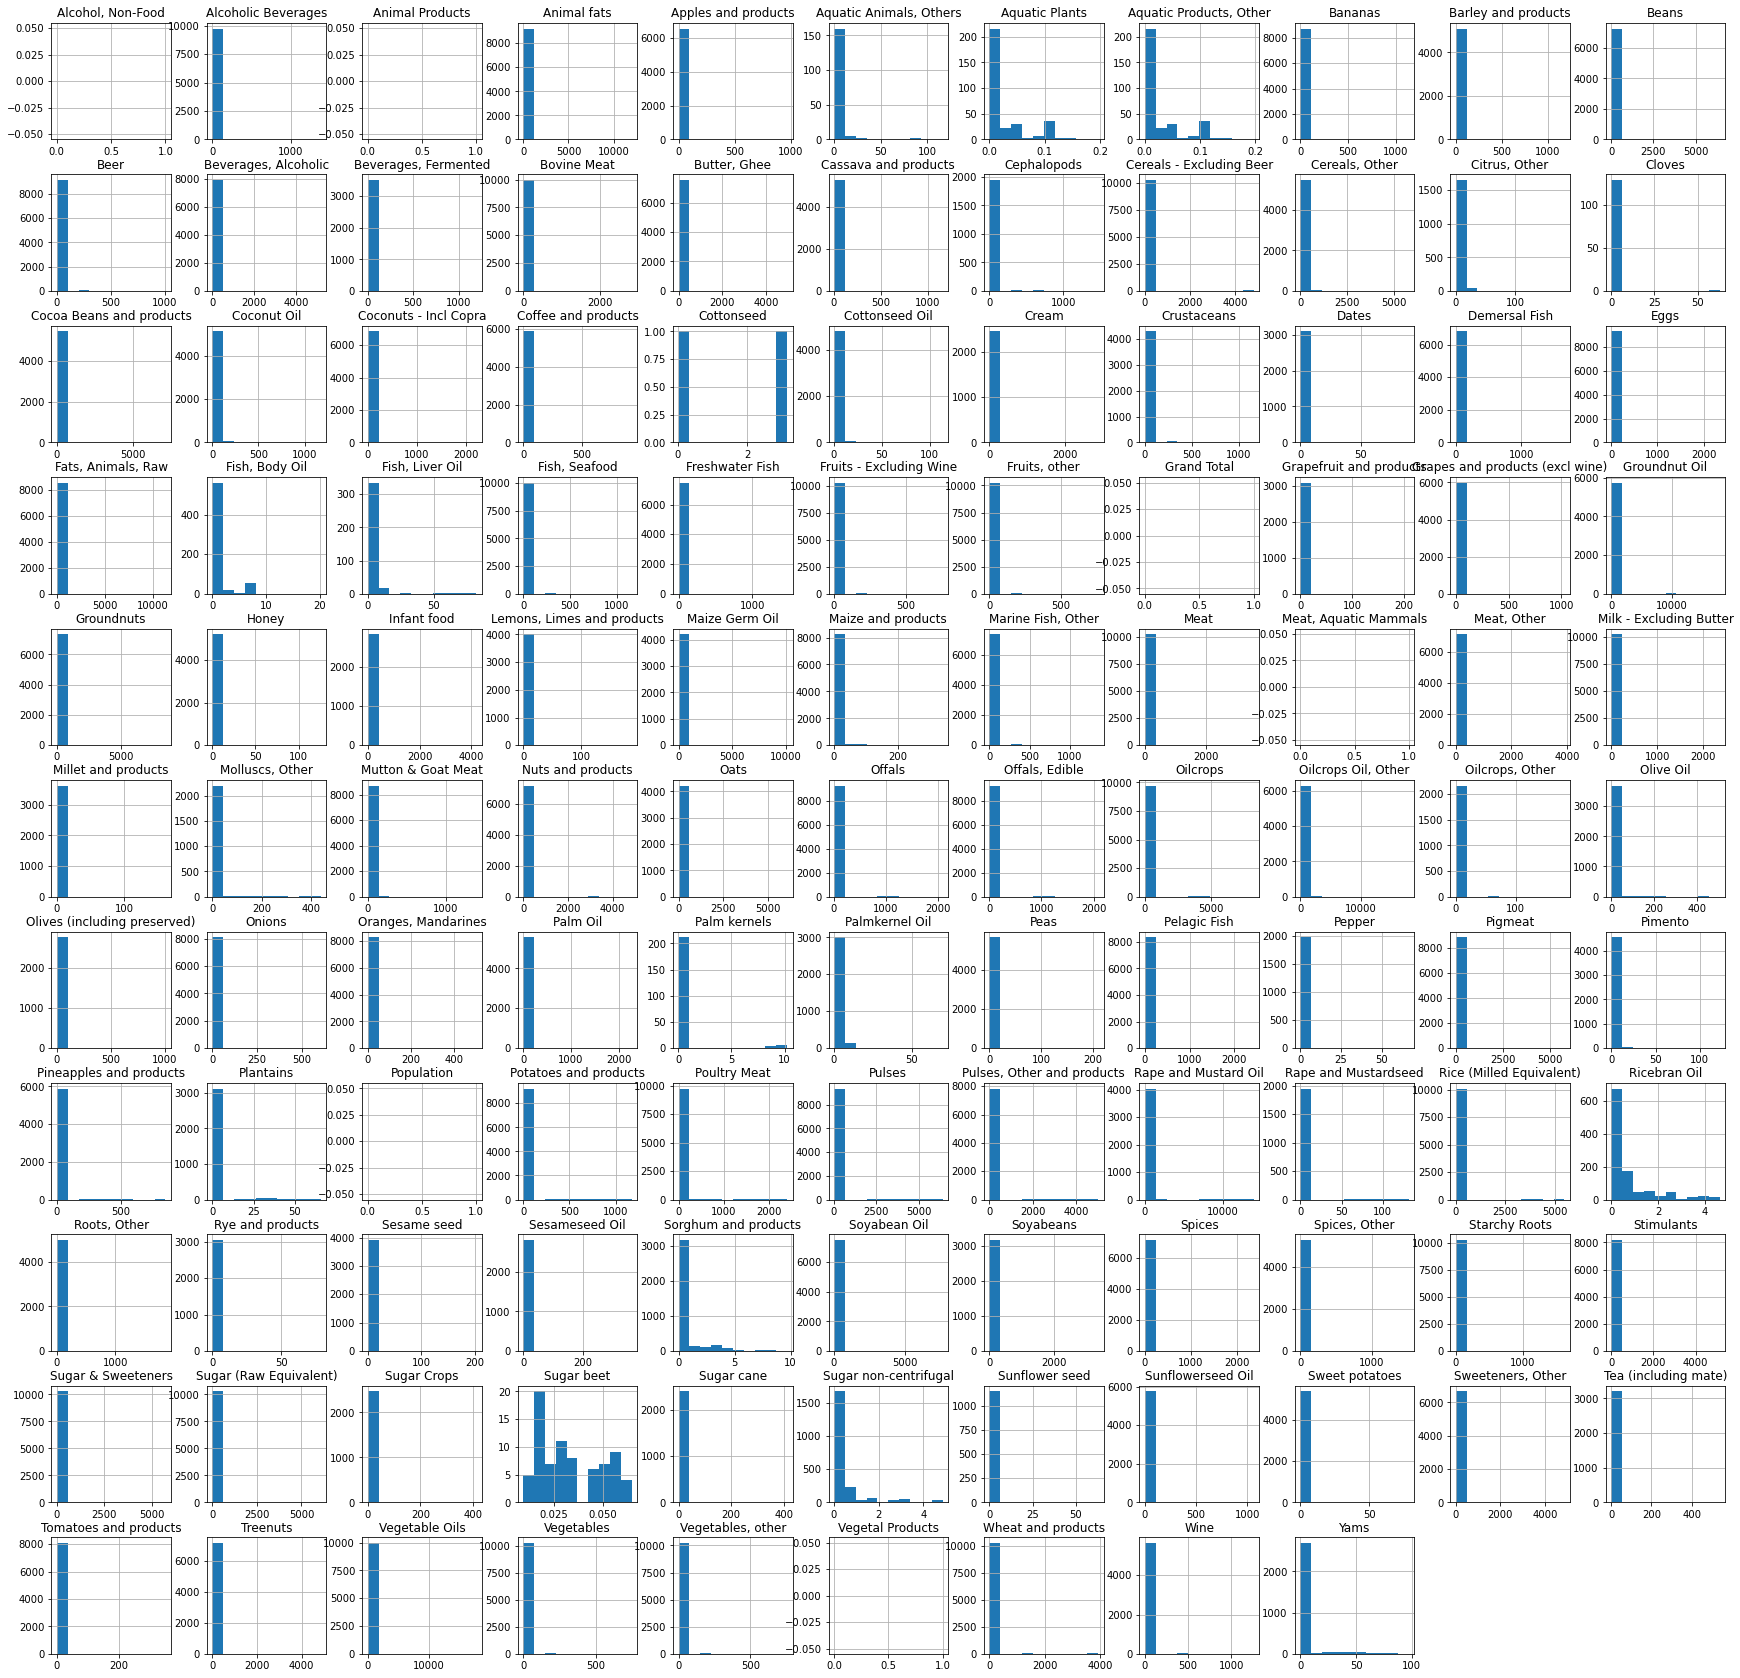

In [38]:
hists = plt.figure(figsize = (30,30))  # Size of the figure
ax = hists.gca()                                
caltonratcalc_df.hist(ax = ax)         # draw a histogram based on the dataset
plt.show()

# Use the factors to calculate the desired variables

In [39]:
# Need to adapt as there are many NaNs that make the below line of code useless (integer - NaN = NaN)
# I'll write a function to work around this. When there is no Feed and Seed data, I will set them to 0,
# as they are generally close to 0, and discounting many countries because they do not have feed and 
# seed data would bias the analysis.  I am sacrificing some accuracy in the data for more and less bias data.
#fbs_pivot_cal_to_tonne["net_production"] = fbs_pivot_cal_to_tonne.apply(lambda row: row.Production - row.Feed - row.Seed, axis=1)

In [40]:
def net_prod_calc(df):
    prod = df["Production"].tolist()
    feed = df["Feed"].tolist()
    seed = df["Seed"].tolist()
    caltonrattotal = df["caltonrattotal"].tolist()
    caltonratpercap = df["caltonratpercap"].tolist()
    caltonratperarea = df["caltonratperarea"].tolist()
    # replace NaN with 0 for feed and seed
    feed = [0 if pd.isna(n) else n for n in feed]
    seed = [0 if pd.isna(n) else n for n in seed]
    net_prod1000tonnelist = []
    net_prodtotallist = []
    net_prodpercaplist = []
    net_prodperarealist = []
    for i in range(0,len(prod)):
        net_prod1000tonne = prod[i] - feed[i] - seed[i]
        net_prodtotal = net_prod1000tonne * caltonrattotal[i]
        net_prodpercap = net_prod1000tonne * caltonratpercap[i]
        net_prodperarea = net_prod1000tonne * caltonratperarea[i]
        net_prod1000tonnelist.append(net_prod1000tonne)
        net_prodtotallist.append(net_prodtotal)
        net_prodpercaplist.append(net_prodpercap)
        net_prodperarealist.append(net_prodperarea)
    return net_prod1000tonnelist, net_prodtotallist, net_prodpercaplist, net_prodperarealist

In [41]:
net_prod1000tonne, net_prodtotal, net_prodpercap, net_prodperarea = net_prod_calc(fbs_pivot_cal_to_tonne)
fbs_pivot_cal_to_tonne["net_prod1000tonne"] = net_prod1000tonne
fbs_pivot_cal_to_tonne["net_prodtotal"] = net_prodtotal
fbs_pivot_cal_to_tonne["net_prodpercap"] = net_prodpercap
fbs_pivot_cal_to_tonne["net_prodperarea"] = net_prodperarea

In [42]:
fbs_pivot_cal_to_tonne.head()

Element,Area,Year_Code,Item,Domestic_supply_quantity,Export_Quantity,Fat_supply_quantity_(g/capita/day),Feed,Food,Food_supply_(kcal/capita/day),Food_supply_quantity_(kg/capita/yr),...,Total_Population_-_Both_sexes,pop,totarea,caltonrattotal,caltonratpercap,caltonratperarea,net_prod1000tonne,net_prodtotal,net_prodpercap,net_prodperarea
0,Afghanistan,1961,Alcoholic Beverages,0.0,NaN,NaN,NaN,0.0,0.0,0.00,...,NaN,8954.0,65223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1961,Animal Products,NaN,NaN,18.44,NaN,NaN,247.0,NaN,...,NaN,8954.0,65223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1961,Animal fats,20.0,NaN,5.29,NaN,20.0,47.0,2.18,...,NaN,8954.0,65223.0,21041.900000,2.350000,0.322615,20.0,420838.000000,47.000000,6.452294
3,Afghanistan,1961,Apples and products,15.0,0.0,0.01,NaN,14.0,2.0,1.60,...,NaN,8954.0,65223.0,1279.142857,0.142857,0.019612,15.0,19187.142857,2.142857,0.294178
4,Afghanistan,1961,Bananas,0.0,NaN,0.00,NaN,0.0,0.0,0.00,...,NaN,8954.0,65223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calculating averages of multiple years

In [43]:
# years = [2015,2016,2017,2018,2019]

In [44]:
# def checkiflast(i,a,b,c):
#     if i == (len(a) - 1):
#         result = True
#     elif a[i] == a[i+1] and b[i] == b[i+1] and c[i] == c[i+1]:
#         result = False
#     else:
#         result = True
#     return result

In [45]:
# def timemean(df, years):
#     summed = 0
#     divisor = 0
#     to_del = []
#     result = []
#     Year_Code = df["Year_Code"].tolist()
#     Value = df["Value"].tolist()
#     Area_Code = df["Area_Code"].tolist()
#     Item_Code = df["Item_Code"].tolist()
#     Element_Code = df["Element_Code"].tolist()
#     for i in range(0,len(Year_Code)):
#         yr = Year_Code[i]
#         if (yr in years) == False:
#             to_del.append(i)
#         elif (yr in years) and (checkiflast(i,Area_Code,Item_Code,Element_Code) == False):   #check it is not the last year
#             to_del.append(i)
#             divisor = divisor + 1
#             summed = summed + Value[i]
#         else:# if it is the last year
#             divisor = divisor + 1
#             summed = summed + Value[i]
#             res = summed / divisor
#             result.append(res)
#             summed = 0
#             divisor = 0
#     return to_del, result

In [46]:
#to_del, result = timemean(fbs_df_order, years)

In [47]:
#fbs_df_small = fbs_df_order.drop(fbs_df_order.index[to_del])

In [48]:
#fbs_df_small["Value"] = result

In [49]:
#fbs_df_small.head()

In [50]:
#print(fbs_df_small.info())
#print(fbs_df_small.describe())

In [51]:
#fbs_df_small = fbs_df_small.reset_index(drop=True)

# Calculating the EATLI

In [52]:
fbs_df_kcal = fbs_df_order.loc[fbs_df_order["Element"] == 'Food supply (kcal/capita/day)']

In [53]:
eatlitems = ["Grand Total", "Cereals - Excluding Beer", "Starchy Roots", "Vegetables", "Fruits - Excluding Wine", 
             "Milk - Excluding Butter", "Bovine Meat", "Pigmeat", "Poultry Meat", "Eggs", "Fish, Seafood", 
             "Pulses", "Soyabeans", "Groundnuts", "Treenuts", "Palm Oil", "Vegetable Oils", "Fats, Animals, Raw", 
             "Sugar Crops", "Butter, Ghee", "Cream", "Mutton & Goat Meat", "Sunflower seed", "Rape and Mustardseed",
             "Sesame seed", "Palmkernel Oil", "Palm Oil", "Coconut Oil", "Fish, Body Oil", "Fish, Liver Oil",
             "Sugar & Sweeteners", "totarea", "pop"]

eatlitemsfix = ["Grand_Total", "Cereals__Excluding_Beer", "Starchy_Roots", "Vegetables", "Fruits__Excluding_Wine", 
             "Milk__Excluding_Butter", "Bovine_Meat", "Pigmeat", "Poultry_Meat", "Eggs", "Fish_Seafood", 
             "Pulses", "Soyabeans", "Groundnuts", "Treenuts", "Palm_Oil", "Vegetable_Oils", "Fats_Animals_Raw", 
             "Sugar_Crops", "Butter_Ghee", "Cream", "Mutton__Goat_Meat", "Sunflower_seed", "Rape_and_Mustardseed",
             "Sesame_seed", "Palmkernel_Oil", "Palm_Oil", "Coconut_Oil", "Fish_Body_Oil", "Fish_Liver_Oil",
             "Sugar__Sweeteners", "totarea", "pop"]

In [54]:
fbs_df_kcal_eatl = fbs_df_kcal[fbs_df_kcal.Item.isin(eatlitems)]

In [55]:
fbs_df_kcal_eatl = fbs_df_kcal_eatl[["Area","Item","Year_Code","Value"]]

In [56]:
fbs_df_kcal_eatl.head(5)

,Area,Item,Year_Code,Value
3520,Armenia,Soyabeans,1992,0.0
3521,Armenia,Soyabeans,1993,0.0
3522,Armenia,Soyabeans,1994,0.0
3523,Armenia,Soyabeans,1995,0.0
3524,Armenia,Soyabeans,1996,0.0


In [57]:
fbs_df_kcal_eatl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285553 entries, 3520 to 11116594
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Area       285553 non-null  object 
 1   Item       285553 non-null  object 
 2   Year_Code  285553 non-null  int64  
 3   Value      285553 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.9+ MB


In [58]:
fbs_df_kcal_eatl_pvt = pd.pivot(fbs_df_kcal_eatl, index=["Area","Year_Code"], columns="Item", values="Value")
fbs_df_kcal_eatl_pvt = fbs_df_kcal_eatl_pvt.reset_index()
fbs_df_kcal_eatl_pvt.columns=fbs_df_kcal_eatl_pvt.columns.str.replace(' ','_')
fbs_df_kcal_eatl_pvt.columns=fbs_df_kcal_eatl_pvt.columns.str.replace('-','')
fbs_df_kcal_eatl_pvt.columns=fbs_df_kcal_eatl_pvt.columns.str.replace('&','')
fbs_df_kcal_eatl_pvt.columns=fbs_df_kcal_eatl_pvt.columns.str.replace(',','')

In [59]:
def eatlicalc(df):
    eatlist = []
    for i in range(0,len(df)):
        calratio = (df.at[i,"Grand_Total"]) / 2500
        eatli = 0
        values = []
        values.append((df.at[i,"Starchy_Roots"]) / (78 * calratio))
        values.append((df.at[i,"Milk__Excluding_Butter"] + df.at[i,"Butter_Ghee"] + df.at[i,"Cream"]) / (306 * calratio))
        values.append((df.at[i,"Bovine_Meat"] + df.at[i,"Mutton__Goat_Meat"]) / (30 * calratio))
        values.append((df.at[i,"Pigmeat"]) / (30 * calratio))
        values.append((df.at[i,"Poultry_Meat"]) / (124 * calratio))
        values.append((df.at[i,"Eggs"]) / (37 * calratio))
        values.append((df.at[i,"Fish_Seafood"]) / (143 * calratio))
        values.append((df.at[i,"Pulses"]) / (344 * calratio))
        values.append((df.at[i,"Soyabeans"]) / (224 * calratio))
        values.append((df.at[i,"Groundnuts"]) / (426 * calratio))
        values.append((df.at[i,"Treenuts"] + df.at[i,"Sunflower_seed"] + df.at[i,"Sesame_seed"]
                       + df.at[i,"Rape_and_Mustardseed"]) / (149 * calratio))
        values.append((df.at[i,"Palm_Oil"]) / (60 * calratio))
        values.append((df.at[i,"Fats_Animals_Raw"]) / (36 * calratio))
        values.append((df.at[i,"Sugar__Sweeteners"] + df.at[i,"Sugar_Crops"]) / (120 * calratio))
        for j in range(0,len(values)):
            if values[j] >= 1:
                eatli = eatli + values[j]
                
        unsaturated_oils = (df.at[i,"Vegetable_Oils"] - df.at[i,"Coconut_Oil"]- df.at[i,"Palm_Oil"] 
                           - df.at[i,"Palmkernel_Oil"] + df.at[i,"Fish_Body_Oil"] + df.at[i,"Fish_Liver_Oil"])
        vegetables = df.at[i,"Vegetables"]
        fruit = df.at[i,"Fruits__Excluding_Wine"]
        if unsaturated_oils >= (708 * calratio):
            eatli = eatli + (unsaturated_oils / (708 * calratio))
        if unsaturated_oils <= (177 * calratio):
            eatli = eatli + 2 - ((unsaturated_oils) / (177 * calratio))
            
        if vegetables >= (156 * calratio):
            eatli = eatli + (vegetables / (156 * calratio))
        if vegetables <= (52 * calratio):
            eatli = eatli + 2 - ((vegetables) / (52 * calratio))
            
        if fruit >= (189 * calratio):
            eatli = eatli + (fruit / (189 * calratio))
        if fruit <= (63 * calratio):
            eatli = eatli + 2 - ((fruit) / (63 * calratio))
            
        if df.at[i,"Cereals__Excluding_Beer"] > (df.at[i,"Grand_Total"] * 0.6):
            eatli = eatli + (df.at[i,"Cereals__Excluding_Beer"] / (df.at[i,"Grand_Total"] * 0.6))
        
        eatlist.append(eatli)
    return eatlist

In [60]:
eatlilist = eatlicalc(fbs_df_kcal_eatl_pvt)

In [61]:
fbs_df_kcal_eatl_pvt["eatli"] = eatlilist

<AxesSubplot:>

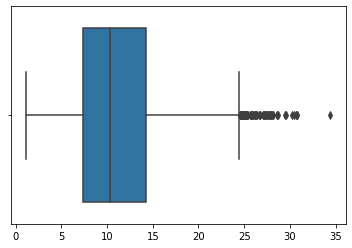

In [62]:
sns.boxplot(x=eatlilist)

array([[<AxesSubplot:title={'center':'eatli'}>]], dtype=object)

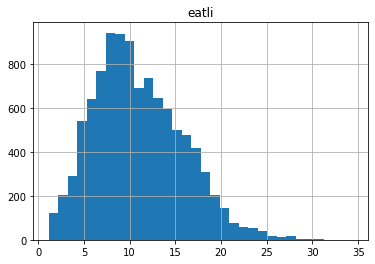

In [63]:
fbs_df_kcal_eatl_pvt.hist(column='eatli', bins=32)

# EATLI for production

In [75]:
catstotot = ["Cereals__Excluding_Beer","Eggs","Fish_Seafood","Fruits__Excluding_Wine","Meat",
             "Milk__Excluding_Butter","Offals","Oilcrops","Pulses","Spices","Starchy_Roots",
             "Stimulants","Sugar__Sweeteners","Sugar_Crops","Treenuts","Vegetable_Oils","Vegetables",
             "Alcoholic_Beverages","Animal_fats","Aquatic_Products_Other"]

In [76]:
allnecessary = ["Cereals - Excluding Beer","Eggs","Fish, Seafood","Fruits - Excluding Wine","Meat", "Milk - Excluding Butter",
                "Offals","Oilcrops","Pulses","Spices","Starchy Roots", "Stimulants","Sugar & Sweeteners","Sugar Crops",
                "Treenuts","Vegetable Oils","Vegetables", "Alcoholic Beverages","Animal fats","Aquatic Products, Other",
                "Grand Total", "Bovine Meat", "Pigmeat", "Poultry Meat", "Soyabeans", "Groundnuts", "Treenuts", "Palm Oil",
                "Fats, Animals, Raw", "Butter, Ghee", "Cream", "Mutton & Goat Meat", "Sunflower seed", "Rape and Mustardseed",
                "Sesame seed", "Palmkernel Oil", "Coconut Oil", "Fish, Body Oil", "Fish, Liver Oil", "totarea", "pop"]

In [77]:
fbs_pivot_cal_to_tonneeatli = fbs_pivot_cal_to_tonne[["Area","Item","Year_Code","net_prodtotal","net_prodpercap","net_prodperarea"]]

In [78]:
fbs_pivot_cal_to_tonneeatli = fbs_pivot_cal_to_tonneeatli[fbs_pivot_cal_to_tonneeatli.Item.isin(allnecessary)]
fbs_pivot_cal_to_tonneeatli.head()

Element,Area,Item,Year_Code,net_prodtotal,net_prodpercap,net_prodperarea
0,Afghanistan,Alcoholic Beverages,1961,NaN,NaN,NaN
2,Afghanistan,Animal fats,1961,4.208380e+05,47.00000,6.452294
8,Afghanistan,Bovine Meat,1961,2.507120e+05,28.00000,3.843920
9,Afghanistan,"Butter, Ghee",1961,2.148960e+05,24.00000,3.294789
10,Afghanistan,Cereals - Excluding Beer,1961,2.490340e+07,2781.26021,381.819357


In [79]:
# Setting up the pivot table
fbs_pivot_cal_to_tonneeatlitot = pd.pivot(fbs_pivot_cal_to_tonneeatli, index=["Area","Year_Code"], columns="Item", values="net_prodtotal")
fbs_pivot_cal_to_tonneeatlitot = fbs_pivot_cal_to_tonneeatlitot.reset_index()
fbs_pivot_cal_to_tonneeatlitot.columns=fbs_pivot_cal_to_tonneeatlitot.columns.str.replace(' ','_')
fbs_pivot_cal_to_tonneeatlitot.columns=fbs_pivot_cal_to_tonneeatlitot.columns.str.replace('-','')
fbs_pivot_cal_to_tonneeatlitot.columns=fbs_pivot_cal_to_tonneeatlitot.columns.str.replace('&','')
fbs_pivot_cal_to_tonneeatlitot.columns=fbs_pivot_cal_to_tonneeatlitot.columns.str.replace(',','')

fbs_pivot_cal_to_tonneeatlipercap = pd.pivot(fbs_pivot_cal_to_tonneeatli, index=["Area","Year_Code"], columns="Item", values="net_prodpercap")
fbs_pivot_cal_to_tonneeatlipercap = fbs_pivot_cal_to_tonneeatlipercap.reset_index()
fbs_pivot_cal_to_tonneeatlipercap.columns=fbs_pivot_cal_to_tonneeatlipercap.columns.str.replace(' ','_')
fbs_pivot_cal_to_tonneeatlipercap.columns=fbs_pivot_cal_to_tonneeatlipercap.columns.str.replace('-','')
fbs_pivot_cal_to_tonneeatlipercap.columns=fbs_pivot_cal_to_tonneeatlipercap.columns.str.replace('&','')
fbs_pivot_cal_to_tonneeatlipercap.columns=fbs_pivot_cal_to_tonneeatlipercap.columns.str.replace(',','')

fbs_pivot_cal_to_tonneeatliperarea = pd.pivot(fbs_pivot_cal_to_tonneeatli, index=["Area","Year_Code"], columns="Item", values="net_prodperarea")
fbs_pivot_cal_to_tonneeatliperarea = fbs_pivot_cal_to_tonneeatliperarea.reset_index()
fbs_pivot_cal_to_tonneeatliperarea.columns=fbs_pivot_cal_to_tonneeatliperarea.columns.str.replace(' ','_')
fbs_pivot_cal_to_tonneeatliperarea.columns=fbs_pivot_cal_to_tonneeatliperarea.columns.str.replace('-','')
fbs_pivot_cal_to_tonneeatliperarea.columns=fbs_pivot_cal_to_tonneeatliperarea.columns.str.replace('&','')
fbs_pivot_cal_to_tonneeatliperarea.columns=fbs_pivot_cal_to_tonneeatliperarea.columns.str.replace(',','')

In [80]:
fbs_pivot_cal_to_tonneeatlitot.head()

Item,Area,Year_Code,Alcoholic_Beverages,Animal_fats,Aquatic_Products_Other,Bovine_Meat,Butter_Ghee,Cereals__Excluding_Beer,Coconut_Oil,Cream,...,Soyabeans,Spices,Starchy_Roots,Stimulants,Sugar__Sweeteners,Sugar_Crops,Sunflower_seed,Treenuts,Vegetable_Oils,Vegetables
0,Afghanistan,1961,NaN,420838.0,NaN,250712.0,214896.0,2.490340e+07,NaN,NaN,...,NaN,0.0,231916.666667,NaN,68012.297872,NaN,NaN,98494.0,325925.600000,221536.656535
1,Afghanistan,1962,NaN,429674.0,NaN,274260.0,219408.0,2.492778e+07,NaN,NaN,...,NaN,0.0,207344.329897,NaN,105239.302326,NaN,NaN,118846.0,401486.166667,225751.428571
2,Afghanistan,1963,NaN,467000.0,NaN,280200.0,242840.0,2.237132e+07,NaN,NaN,...,NaN,0.0,223162.524272,NaN,97551.111111,NaN,NaN,102740.0,473226.666667,241450.578512
3,Afghanistan,1964,NaN,486897.0,NaN,286410.0,248222.0,2.504816e+07,NaN,NaN,...,NaN,0.0,237459.927273,NaN,58342.777778,NaN,NaN,105017.0,411989.769231,257843.780679
4,Afghanistan,1965,NaN,517545.0,NaN,292950.0,273420.0,2.546949e+07,NaN,NaN,...,NaN,0.0,242655.929204,NaN,105563.017241,NaN,NaN,117180.0,446185.384615,263141.052632


In [81]:
fbs_pivot_cal_to_tonneeatlipercap.head()

Item,Area,Year_Code,Alcoholic_Beverages,Animal_fats,Aquatic_Products_Other,Bovine_Meat,Butter_Ghee,Cereals__Excluding_Beer,Coconut_Oil,Cream,...,Soyabeans,Spices,Starchy_Roots,Stimulants,Sugar__Sweeteners,Sugar_Crops,Sunflower_seed,Treenuts,Vegetable_Oils,Vegetables
0,Afghanistan,1961,NaN,47.0,NaN,28.0,24.0,2781.260210,NaN,NaN,...,NaN,0.0,25.900901,NaN,7.595745,NaN,NaN,11.0,36.400000,24.741641
1,Afghanistan,1962,NaN,47.0,NaN,30.0,24.0,2726.731778,NaN,NaN,...,NaN,0.0,22.680412,NaN,11.511628,NaN,NaN,13.0,43.916667,24.693878
2,Afghanistan,1963,NaN,50.0,NaN,30.0,26.0,2395.215990,NaN,NaN,...,NaN,0.0,23.893204,NaN,10.444444,NaN,NaN,11.0,50.666667,25.851240
3,Afghanistan,1964,NaN,51.0,NaN,30.0,26.0,2623.667956,NaN,NaN,...,NaN,0.0,24.872727,NaN,6.111111,NaN,NaN,11.0,43.153846,27.007833
4,Afghanistan,1965,NaN,53.0,NaN,30.0,28.0,2608.242916,NaN,NaN,...,NaN,0.0,24.849558,NaN,10.810345,NaN,NaN,12.0,45.692308,26.947368


In [82]:
fbs_pivot_cal_to_tonneeatliperarea.head()

Item,Area,Year_Code,Alcoholic_Beverages,Animal_fats,Aquatic_Products_Other,Bovine_Meat,Butter_Ghee,Cereals__Excluding_Beer,Coconut_Oil,Cream,...,Soyabeans,Spices,Starchy_Roots,Stimulants,Sugar__Sweeteners,Sugar_Crops,Sunflower_seed,Treenuts,Vegetable_Oils,Vegetables
0,Afghanistan,1961,NaN,6.452294,NaN,3.843920,3.294789,381.819357,NaN,NaN,...,NaN,0.0,3.555750,NaN,1.042766,NaN,NaN,1.510111,4.997096,3.396603
1,Afghanistan,1962,NaN,6.587768,NaN,4.204958,3.363967,382.193121,NaN,NaN,...,NaN,0.0,3.179006,NaN,1.613531,NaN,NaN,1.822149,6.155592,3.461224
2,Afghanistan,1963,NaN,7.160051,NaN,4.296031,3.723226,342.997368,NaN,NaN,...,NaN,0.0,3.421531,NaN,1.495655,NaN,NaN,1.575211,7.255518,3.701924
3,Afghanistan,1964,NaN,7.465112,NaN,4.391242,3.805743,384.038728,NaN,NaN,...,NaN,0.0,3.640739,NaN,0.894512,NaN,NaN,1.610122,6.316633,3.953265
4,Afghanistan,1965,NaN,7.935008,NaN,4.491514,4.192079,390.498629,NaN,NaN,...,NaN,0.0,3.720404,NaN,1.618494,NaN,NaN,1.796605,6.840921,4.034483


In [83]:
def calcgrandtotal(df):
    grandtotlist = []
    for i in range(0,len(df)):
        grandtot = 0
        for j in catstotot:
            if df.at[i,j] > 0:
                grandtot = grandtot + df.at[i,j]
        grandtotlist.append(grandtot)
    return grandtotlist

In [84]:
fbs_pivot_cal_to_tonneeatlipercap["Grand_Total"] = calcgrandtotal(fbs_pivot_cal_to_tonneeatlipercap)
fbs_pivot_cal_to_tonneeatlitot["Grand_Total"] = calcgrandtotal(fbs_pivot_cal_to_tonneeatlitot)
fbs_pivot_cal_to_tonneeatliperarea["Grand_Total"] = calcgrandtotal(fbs_pivot_cal_to_tonneeatliperarea)

In [85]:
def eatlicalcprod(df):
    df2 = df
    df = df.fillna(0)
    eatlist = []
    for i in range(0,len(df)):
        calratio = 1
        eatli = 0
        values = []
        values.append((df.at[i,"Starchy_Roots"]) / (78 * calratio))
        values.append((df.at[i,"Milk__Excluding_Butter"] + df.at[i,"Butter_Ghee"] + df.at[i,"Cream"]) / (306 * calratio))
        values.append((df.at[i,"Bovine_Meat"] + df.at[i,"Mutton__Goat_Meat"]) / (30 * calratio))
        values.append((df.at[i,"Pigmeat"]) / (30 * calratio))
        values.append((df.at[i,"Poultry_Meat"]) / (124 * calratio))
        values.append((df.at[i,"Eggs"]) / (37 * calratio))
        values.append((df.at[i,"Fish_Seafood"]) / (143 * calratio))
        values.append((df.at[i,"Pulses"]) / (344 * calratio))
        values.append((df.at[i,"Soyabeans"]) / (224 * calratio))
        values.append((df.at[i,"Groundnuts"]) / (426 * calratio))
        values.append((df.at[i,"Treenuts"] + df.at[i,"Sunflower_seed"] + df.at[i,"Sesame_seed"]
                       + df.at[i,"Rape_and_Mustardseed"]) / (149 * calratio))
        values.append((df.at[i,"Palm_Oil"]) / (60 * calratio))
        values.append((df.at[i,"Fats_Animals_Raw"]) / (36 * calratio))
        values.append((df.at[i,"Sugar__Sweeteners"] + df.at[i,"Sugar_Crops"]) / (120 * calratio))
        for j in range(0,len(values)):
            if values[j] > 0:
                eatli = eatli + values[j]

                
        unsaturated_oils = (df.at[i,"Vegetable_Oils"] - df.at[i,"Coconut_Oil"]- df.at[i,"Palm_Oil"] 
                           - df.at[i,"Palmkernel_Oil"] + df.at[i,"Fish_Body_Oil"] + df.at[i,"Fish_Liver_Oil"])
        vegetables = df.at[i,"Vegetables"]
        fruit = df.at[i,"Fruits__Excluding_Wine"]
        values.append(unsaturated_oils)
        values.append(vegetables)
        values.append(fruit)
        values.append(df.at[i,"Cereals__Excluding_Beer"])
        if unsaturated_oils > (708 * calratio):
            eatli = eatli + (unsaturated_oils / (708 * calratio))
        if unsaturated_oils < (177 * calratio):
            eatli = eatli + 2 - ((unsaturated_oils) / (177 * calratio))
            
        if vegetables > (156 * calratio):
            eatli = eatli + (vegetables / (156 * calratio))
        if vegetables < (52 * calratio):
            eatli = eatli + 2 - ((vegetables) / (52 * calratio))
            
        if fruit > (189 * calratio):
            eatli = eatli + (fruit / (189 * calratio))
        if fruit < (63 * calratio):
            eatli = eatli + 2 - ((fruit) / (63 * calratio))
            
        if df.at[i,"Cereals__Excluding_Beer"] > (df.at[i,"Grand_Total"] * 0.6):
            eatli = eatli + (df.at[i,"Cereals__Excluding_Beer"] / (df.at[i,"Grand_Total"] * 0.6))        
        
        nan_list = [df2.at[i,"Starchy_Roots"], df2.at[i,"Milk__Excluding_Butter"], df2.at[i,"Bovine_Meat"],
                    df2.at[i,"Mutton__Goat_Meat"], df2.at[i,"Pigmeat"], df2.at[i,"Poultry_Meat"], df2.at[i,"Eggs"],
                    df2.at[i,"Fish_Seafood"], df2.at[i,"Pulses"], df2.at[i,"Fats_Animals_Raw"], df2.at[i,"Vegetable_Oils"],
                    df2.at[i,"Vegetables",], df2.at[i,"Fruits__Excluding_Wine"], df2.at[i,"Cereals__Excluding_Beer"]]
        if np.count_nonzero(np.isnan(nan_list)) > 0:
            eatli = np.nan
        
        eatlist.append(eatli)
    return eatlist

In [86]:
eatliprodtot = eatlicalcprod(fbs_pivot_cal_to_tonneeatlitot)
eatliprodpercap = eatlicalcprod(fbs_pivot_cal_to_tonneeatlipercap)
eatliprodperarea = eatlicalcprod(fbs_pivot_cal_to_tonneeatliperarea)

In [87]:
fbs_pivot_cal_to_tonneeatlipercap["eatliprodpercap"] = eatliprodpercap
fbs_pivot_cal_to_tonneeatlipercap["eatliprodtot"] = eatliprodtot
fbs_pivot_cal_to_tonneeatlipercap["eatliprodperarea"] = eatliprodperarea
fbs_pivot_cal_to_tonneeatlifinal = fbs_pivot_cal_to_tonneeatlipercap
del [fbs_pivot_cal_to_tonneeatlitot, fbs_pivot_cal_to_tonneeatlipercap, fbs_pivot_cal_to_tonneeatliperarea]

In [88]:
fbs_pivot_cal_to_tonneeatlifinal["eatliprodpercapln"] = fbs_pivot_cal_to_tonneeatlifinal["eatliprodpercap"].apply(lambda x: np.log(x + 1))
fbs_pivot_cal_to_tonneeatlifinal["eatliprodtotln"] = fbs_pivot_cal_to_tonneeatlifinal["eatliprodtot"].apply(lambda x: np.log(x + 1))
fbs_pivot_cal_to_tonneeatlifinal["eatliprodperarealn"] = fbs_pivot_cal_to_tonneeatlifinal["eatliprodperarea"].apply(lambda x: np.log(x + 1))

<AxesSubplot:xlabel='eatliprodpercap'>

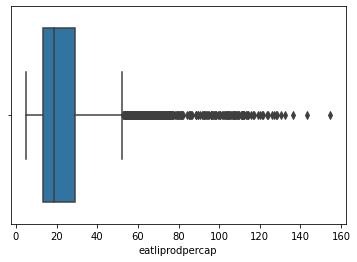

In [89]:
sns.boxplot(x=fbs_pivot_cal_to_tonneeatlifinal["eatliprodpercap"])

array([[<AxesSubplot:title={'center':'eatliprodpercap'}>]], dtype=object)

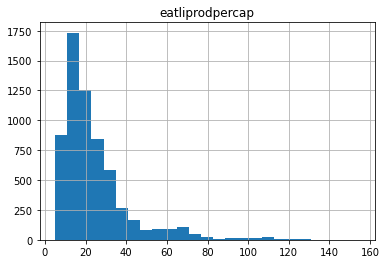

In [90]:
fbs_pivot_cal_to_tonneeatlifinal.hist(column='eatliprodpercap', bins=25)

<AxesSubplot:xlabel='eatliprodpercapln'>

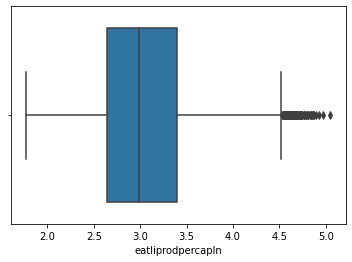

In [91]:
sns.boxplot(x=fbs_pivot_cal_to_tonneeatlifinal["eatliprodpercapln"])

array([[<AxesSubplot:title={'center':'eatliprodpercapln'}>]], dtype=object)

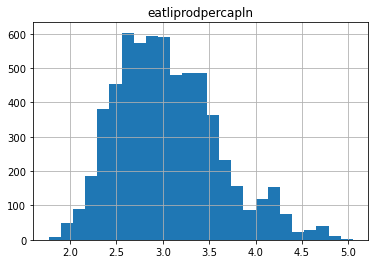

In [92]:
fbs_pivot_cal_to_tonneeatlifinal.hist(column='eatliprodpercapln', bins=25)

<AxesSubplot:xlabel='eatliprodtot'>

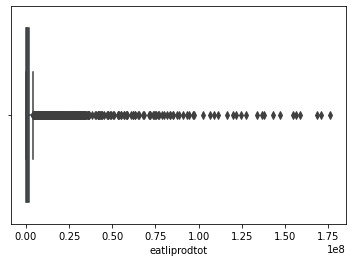

In [93]:
sns.boxplot(x=fbs_pivot_cal_to_tonneeatlifinal["eatliprodtot"])

array([[<AxesSubplot:title={'center':'eatliprodtot'}>]], dtype=object)

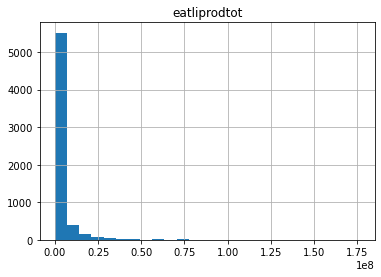

In [94]:
fbs_pivot_cal_to_tonneeatlifinal.hist(column='eatliprodtot', bins=25)

<AxesSubplot:xlabel='eatliprodtotln'>

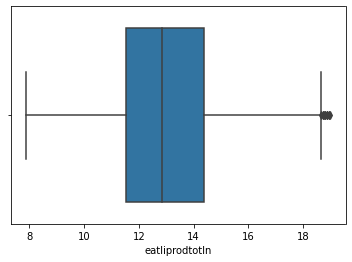

In [95]:
sns.boxplot(x=fbs_pivot_cal_to_tonneeatlifinal["eatliprodtotln"])

array([[<AxesSubplot:title={'center':'eatliprodtotln'}>]], dtype=object)

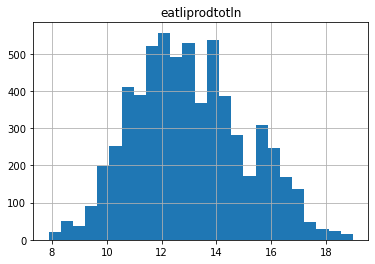

In [96]:
fbs_pivot_cal_to_tonneeatlifinal.hist(column='eatliprodtotln', bins=25)

<AxesSubplot:xlabel='eatliprodperarea'>

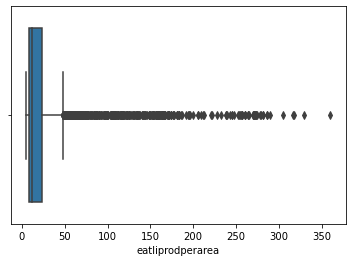

In [97]:
sns.boxplot(x=fbs_pivot_cal_to_tonneeatlifinal["eatliprodperarea"])

array([[<AxesSubplot:title={'center':'eatliprodperarea'}>]], dtype=object)

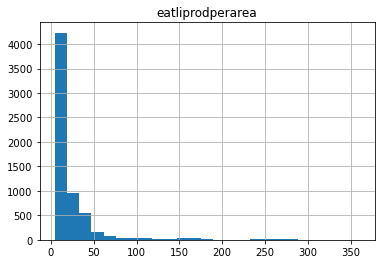

In [98]:
fbs_pivot_cal_to_tonneeatlifinal.hist(column='eatliprodperarea', bins=25)

<AxesSubplot:xlabel='eatliprodperarealn'>

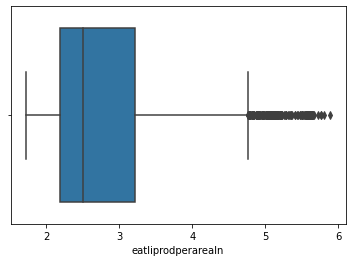

In [99]:
sns.boxplot(x=fbs_pivot_cal_to_tonneeatlifinal["eatliprodperarealn"])

array([[<AxesSubplot:title={'center':'eatliprodperarealn'}>]],
      dtype=object)

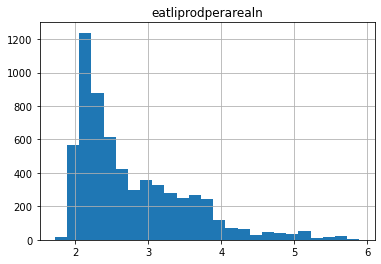

In [100]:
fbs_pivot_cal_to_tonneeatlifinal.hist(column='eatliprodperarealn', bins=25)

In [101]:
print(fbs_pivot_cal_to_tonneeatlifinal.info())
print(fbs_pivot_cal_to_tonneeatlifinal.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10393 entries, 0 to 10392
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     10393 non-null  object 
 1   Year_Code                10393 non-null  int64  
 2   Alcoholic_Beverages      9537 non-null   float64
 3   Animal_fats              9294 non-null   float64
 4   Aquatic_Products_Other   319 non-null    float64
 5   Bovine_Meat              10030 non-null  float64
 6   Butter_Ghee              6547 non-null   float64
 7   Cereals__Excluding_Beer  9866 non-null   float64
 8   Coconut_Oil              4484 non-null   float64
 9   Cream                    2212 non-null   float64
 10  Eggs                     9403 non-null   float64
 11  Fats_Animals_Raw         8588 non-null   float64
 12  Fish_Body_Oil            641 non-null    float64
 13  Fish_Liver_Oil           284 non-null    float64
 14  Fish_Seafood          

C:\Users\T430\AppData\Local\Temp/ipykernel_13448/3023162776.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  fbs_pivot_cal_to_tonneeatlifinal.hist(ax = ax)         # draw a histogram based on the dataset


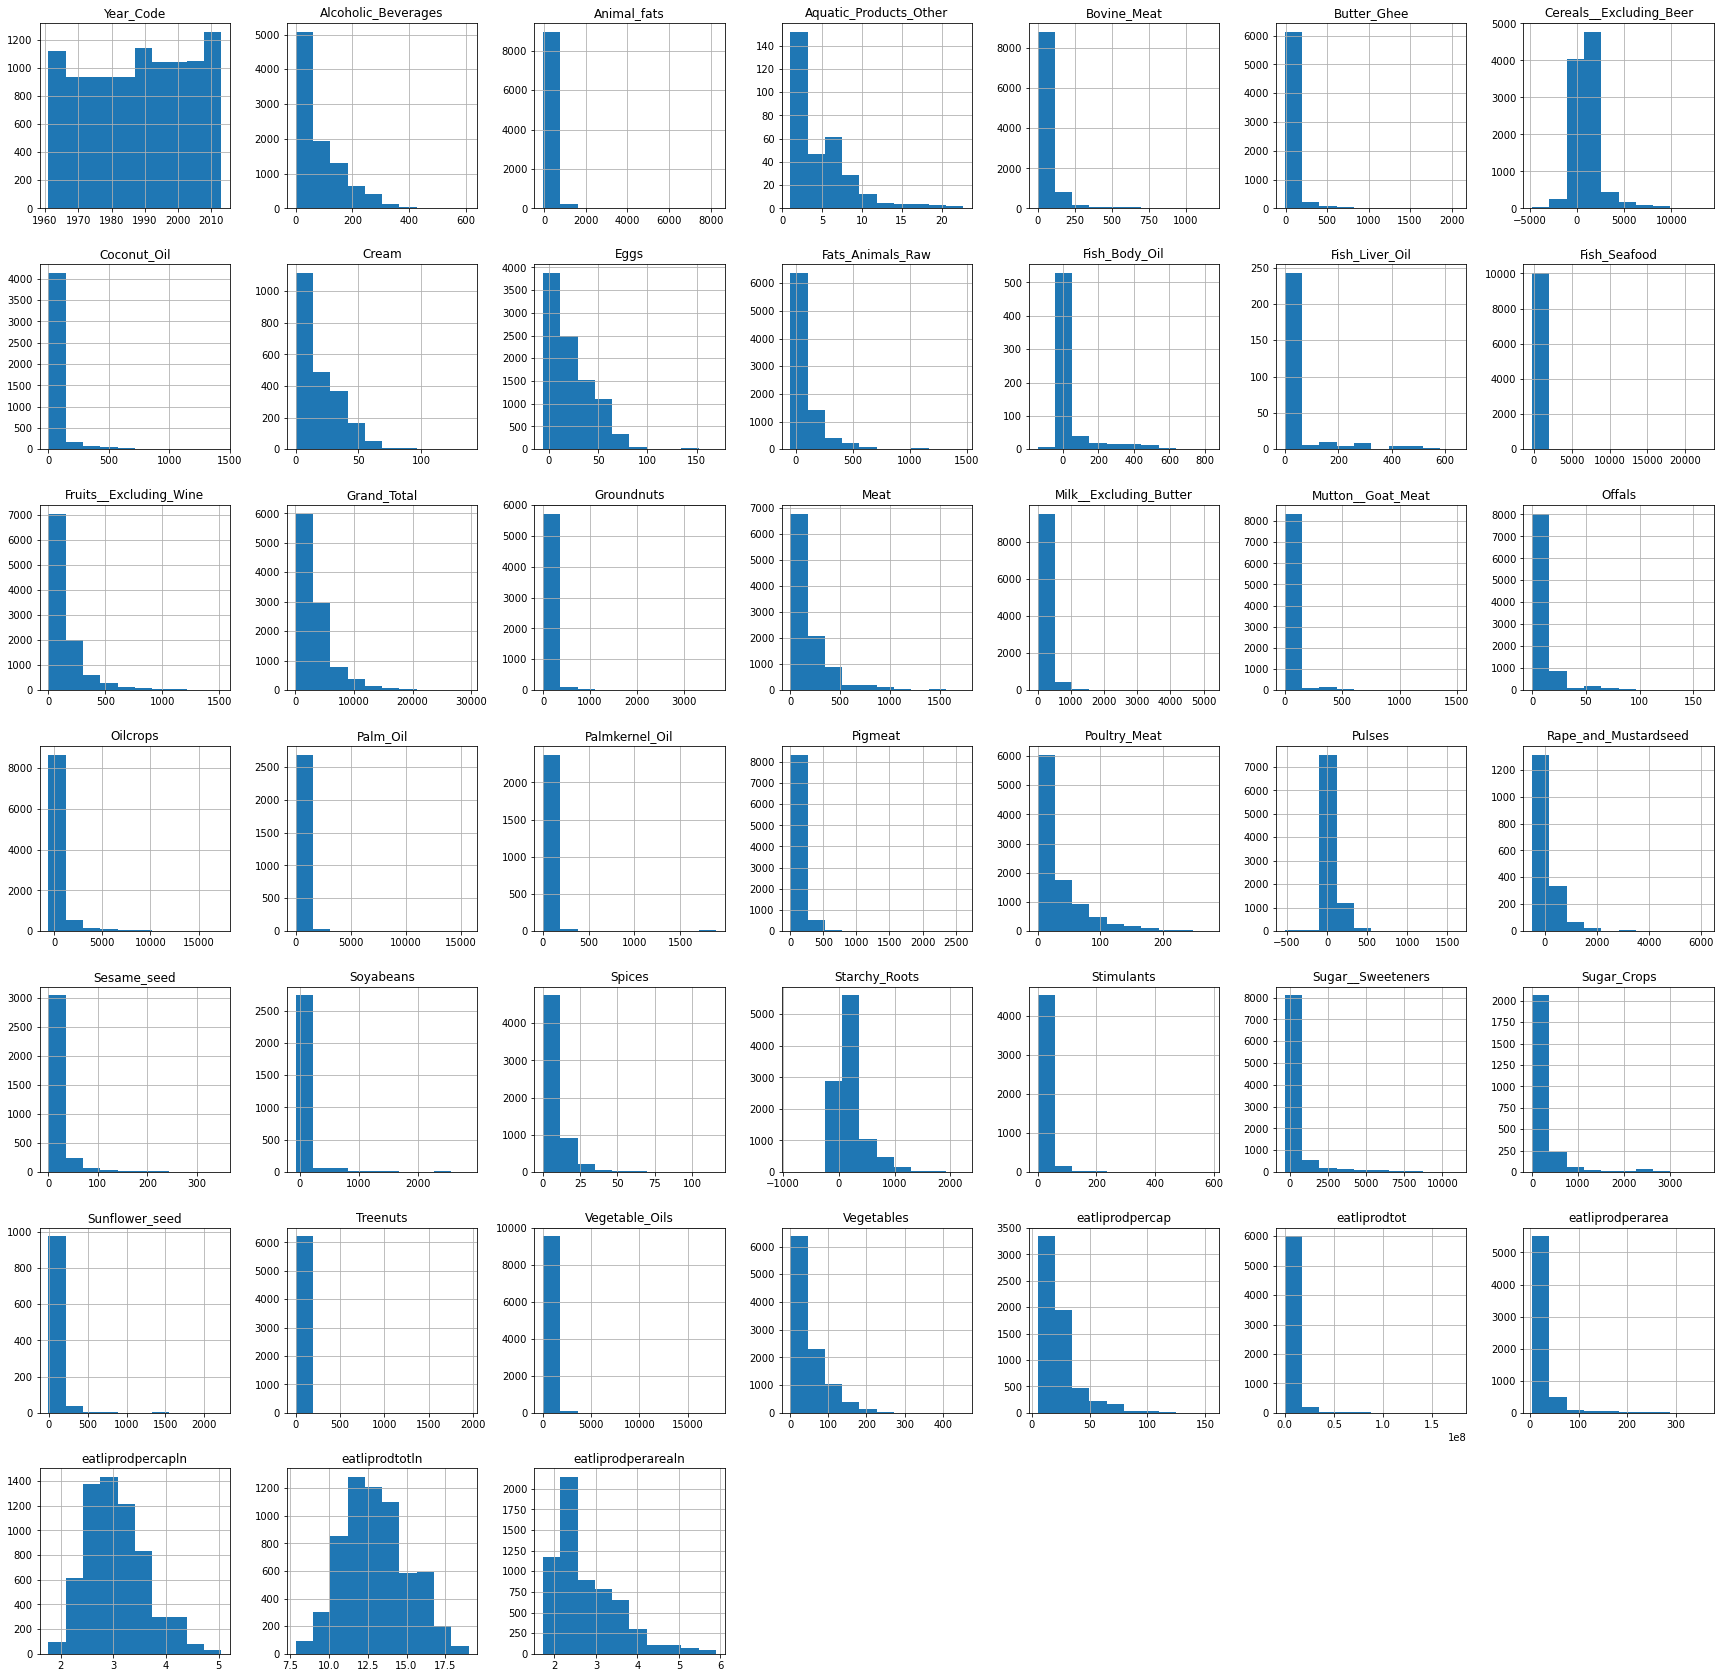

In [102]:
hists = plt.figure(figsize = (30,30))  # Size of the figure
ax = hists.gca()                                
fbs_pivot_cal_to_tonneeatlifinal.hist(ax = ax)         # draw a histogram based on the dataset
plt.show()

In [103]:
landuseindicators_df = pd.read_csv("Environment_LandUse_E_All_Data_(Normalized).csv", encoding="latin-1")

In [104]:
landuseindicators_df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,6610,Agricultural land,7209,Share in Land area,1961,1961,%,57.80,Fc
1,2,Afghanistan,6610,Agricultural land,7209,Share in Land area,1962,1962,%,57.89,Fc
2,2,Afghanistan,6610,Agricultural land,7209,Share in Land area,1963,1963,%,57.97,Fc
3,2,Afghanistan,6610,Agricultural land,7209,Share in Land area,1964,1964,%,58.07,Fc
4,2,Afghanistan,6610,Agricultural land,7209,Share in Land area,1965,1965,%,58.07,Fc


In [105]:
landuse_df.head()

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year_Code,Year,Unit,Value,Flag
0,2,Afghanistan,6600,Country area,5110,Area,1961,1961,1000 ha,65286.0,W
1,2,Afghanistan,6600,Country area,5110,Area,1962,1962,1000 ha,65286.0,W
2,2,Afghanistan,6600,Country area,5110,Area,1963,1963,1000 ha,65286.0,W
3,2,Afghanistan,6600,Country area,5110,Area,1964,1964,1000 ha,65286.0,W
4,2,Afghanistan,6600,Country area,5110,Area,1965,1965,1000 ha,65286.0,W


In [106]:
primary_land_variables = ['Land area', 'Agriculture', "Cropland", "Land under perm. meadows and pastures",
                        "Naturally regenerating forest", "Planted Forest", "Primary_Forest",
                         "Land area equipped for irrigation"]

secondary_land_variables = ['Land area', 'Agriculture', "Cropland", "Land under perm. meadows and pastures",
                         "Perm. meadows & pastures - Cultivated", "Perm. meadows & pastures - Nat. growing",
                        "Forest land", "Naturally regenerating forest", "Planted Forest", "Primary Forest",
                         "Agriculture area under organic agric.", "Cropland area under organic agric.",
                         "Perm. meadows & pastures area under organic agric.", 'Land area equipped for irrigation',
                        'Agriculture area actually irrigated']

landuse_small = landuse_df[landuse_df.Item.isin(secondary_land_variables)]

In [107]:
landuse_piv = pd.pivot_table(landuse_small, index=["Area","Year_Code"], columns="Item", values="Value")
landuse_piv.columns=landuse_piv.columns.str.replace(' ','_', regex=True)
landuse_piv.columns=landuse_piv.columns.str.replace('-','', regex=True)
landuse_piv.columns=landuse_piv.columns.str.replace('&','', regex=True)
landuse_piv.columns=landuse_piv.columns.str.replace(',','', regex=True)
landuse_piv.columns=landuse_piv.columns.str.replace('.','', regex=True)
landuse_piv = landuse_piv.reset_index()

In [108]:
landuse_piv.head()

Item,Area,Year_Code,Agriculture,Agriculture_area_actually_irrigated,Agriculture_area_under_organic_agric,Cropland,Cropland_area_under_organic_agric,Forest_land,Land_area,Land_area_equipped_for_irrigation,Land_under_perm_meadows_and_pastures,Naturally_regenerating_forest,Perm_meadows__pastures__Cultivated,Perm_meadows__pastures__Nat_growing,Perm_meadows__pastures_area_under_organic_agric,Planted_Forest,Primary_Forest
0,Afghanistan,1961,37700.0,NaN,NaN,7700.0,NaN,NaN,65223.0,2380.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1962,37760.0,NaN,NaN,7760.0,NaN,NaN,65223.0,2380.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1963,37810.0,NaN,NaN,7810.0,NaN,NaN,65223.0,2380.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1964,37873.0,NaN,NaN,7873.0,NaN,NaN,65223.0,2380.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1965,37875.0,NaN,NaN,7875.0,NaN,NaN,65223.0,2380.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
print(landuse_piv.info())
print(landuse_piv.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15010 entries, 0 to 15009
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Area                                             15010 non-null  object 
 1   Year_Code                                        15010 non-null  int64  
 2   Agriculture                                      14630 non-null  float64
 3   Agriculture_area_actually_irrigated              951 non-null    float64
 4   Agriculture_area_under_organic_agric             2862 non-null   float64
 5   Cropland                                         14445 non-null  float64
 6   Cropland_area_under_organic_agric                624 non-null    float64
 7   Forest_land                                      7921 non-null   float64
 8   Land_area                                        15010 non-null  float64
 9   Land_area_equipped_for_irrig

In [114]:
# Yes, this takes a VERY long time.
# This function is used out of an abundance of caution to be certain all of the variables line up correctly
fbs_pivot_cal_to_tonneeatlifinal["Agriculture_area"] = add_item(fbs_pivot_cal_to_tonneeatlifinal, landuse_piv, "Agriculture")
fbs_pivot_cal_to_tonneeatlifinal["Agriculture_area_actually_irrigated"] = add_item(fbs_pivot_cal_to_tonneeatlifinal, landuse_piv, "Agriculture_area_actually_irrigated")

In [115]:
fbs_pivot_cal_to_tonneeatlifinal["Agriculture_area_under_organic_agric"] = add_item(fbs_pivot_cal_to_tonneeatlifinal, landuse_piv, "Agriculture_area_under_organic_agric")
fbs_pivot_cal_to_tonneeatlifinal["Cropland"] = add_item(fbs_pivot_cal_to_tonneeatlifinal, landuse_piv, "Cropland")


In [116]:
fbs_pivot_cal_to_tonneeatlifinal["Cropland_area_under_organic_agric"] = add_item(fbs_pivot_cal_to_tonneeatlifinal, landuse_piv, "Cropland_area_under_organic_agric")
fbs_pivot_cal_to_tonneeatlifinal["Forest_land"] = add_item(fbs_pivot_cal_to_tonneeatlifinal, landuse_piv, "Forest_land")

In [117]:
fbs_pivot_cal_to_tonneeatlifinal["Land_area"] = add_item(fbs_pivot_cal_to_tonneeatlifinal, landuse_piv, "Land_area")
fbs_pivot_cal_to_tonneeatlifinal["Land_area_equipped_for_irrigation"] = add_item(fbs_pivot_cal_to_tonneeatlifinal, landuse_piv, "Land_area_equipped_for_irrigation")

In [118]:
fbs_pivot_cal_to_tonneeatlifinal["Land_under_perm_meadows_and_pastures"] = add_item(fbs_pivot_cal_to_tonneeatlifinal, landuse_piv, "Land_under_perm_meadows_and_pastures")
fbs_pivot_cal_to_tonneeatlifinal["Naturally_regenerating_forest"] = add_item(fbs_pivot_cal_to_tonneeatlifinal, landuse_piv, "Naturally_regenerating_forest")

In [119]:
fbs_pivot_cal_to_tonneeatlifinal["Perm_meadows__pastures__Cultivated"] = add_item(fbs_pivot_cal_to_tonneeatlifinal, landuse_piv, "Perm_meadows__pastures__Cultivated")
fbs_pivot_cal_to_tonneeatlifinal["Perm_meadows__pastures__Nat_growing"] = add_item(fbs_pivot_cal_to_tonneeatlifinal, landuse_piv, "Perm_meadows__pastures__Nat_growing")

In [121]:
fbs_pivot_cal_to_tonneeatlifinal["Perm_meadows__pastures_area_under_organic_agric"] = add_item(fbs_pivot_cal_to_tonneeatlifinal, landuse_piv, "Perm_meadows__pastures_area_under_organic_agric")
fbs_pivot_cal_to_tonneeatlifinal["Planted_Forest"] = add_item(fbs_pivot_cal_to_tonneeatlifinal, landuse_piv, "Planted_Forest")
fbs_pivot_cal_to_tonneeatlifinal["Primary_Forest"] = add_item(fbs_pivot_cal_to_tonneeatlifinal, landuse_piv, "Primary_Forest")

In [134]:
copy = fbs_pivot_cal_to_tonneeatlifinal

In [135]:
fbs_pivot_cal_to_tonneeatlifinal["Agriculture_arealn"] = fbs_pivot_cal_to_tonneeatlifinal["Agriculture_area"].apply(lambda x: np.log(x + 1))
fbs_pivot_cal_to_tonneeatlifinal["Agriculture_area_actually_irrigatedln"] = fbs_pivot_cal_to_tonneeatlifinal["Agriculture_area_actually_irrigated"].apply(lambda x: np.log(x + 1))
fbs_pivot_cal_to_tonneeatlifinal["Agriculture_area_under_organic_agricln"] = fbs_pivot_cal_to_tonneeatlifinal["Agriculture_area_under_organic_agric"].apply(lambda x: np.log(x + 1))
fbs_pivot_cal_to_tonneeatlifinal["Croplandln"] = fbs_pivot_cal_to_tonneeatlifinal["Cropland"].apply(lambda x: np.log(x + 1))
fbs_pivot_cal_to_tonneeatlifinal["Cropland_area_under_organic_agricln"] = fbs_pivot_cal_to_tonneeatlifinal["Cropland_area_under_organic_agric"].apply(lambda x: np.log(x + 1))
fbs_pivot_cal_to_tonneeatlifinal["Forest_landln"] = fbs_pivot_cal_to_tonneeatlifinal["Forest_land"].apply(lambda x: np.log(x + 1))
fbs_pivot_cal_to_tonneeatlifinal["Land_arealn"] = fbs_pivot_cal_to_tonneeatlifinal["Land_area"].apply(lambda x: np.log(x + 1))
fbs_pivot_cal_to_tonneeatlifinal["Land_area_equipped_for_irrigationln"] = fbs_pivot_cal_to_tonneeatlifinal["Land_area_equipped_for_irrigation"].apply(lambda x: np.log(x + 1))
fbs_pivot_cal_to_tonneeatlifinal["Land_under_perm_meadows_and_pasturesln"] = fbs_pivot_cal_to_tonneeatlifinal["Land_under_perm_meadows_and_pastures"].apply(lambda x: np.log(x + 1))
fbs_pivot_cal_to_tonneeatlifinal["Naturally_regenerating_forestln"] = fbs_pivot_cal_to_tonneeatlifinal["Naturally_regenerating_forest"].apply(lambda x: np.log(x + 1))
fbs_pivot_cal_to_tonneeatlifinal["Perm_meadows__pastures__Cultivatedln"] = fbs_pivot_cal_to_tonneeatlifinal["Perm_meadows__pastures__Cultivated"].apply(lambda x: np.log(x + 1))
fbs_pivot_cal_to_tonneeatlifinal["Perm_meadows__pastures__Nat_growingln"] = fbs_pivot_cal_to_tonneeatlifinal["Perm_meadows__pastures__Nat_growing"].apply(lambda x: np.log(x + 1))
fbs_pivot_cal_to_tonneeatlifinal["Perm_meadows__pastures_area_under_organic_agricln"] = fbs_pivot_cal_to_tonneeatlifinal["Perm_meadows__pastures_area_under_organic_agric"].apply(lambda x: np.log(x + 1))
fbs_pivot_cal_to_tonneeatlifinal["Planted_Forestln"] = fbs_pivot_cal_to_tonneeatlifinal["Planted_Forest"].apply(lambda x: np.log(x + 1))
fbs_pivot_cal_to_tonneeatlifinal["Primary_Forestln"] = fbs_pivot_cal_to_tonneeatlifinal["Primary_Forest"].apply(lambda x: np.log(x + 1))

In [136]:
# This shows the junction between 2 areas to check that the new variables line up
# It's not a thorough test, but a handy way to spot the most glaring of flaws in the function
fbs_pivot_cal_to_tonneeatlifinal[50:60]

Item,Area,Year_Code,Alcoholic_Beverages,Animal_fats,Aquatic_Products_Other,Bovine_Meat,Butter_Ghee,Cereals__Excluding_Beer,Coconut_Oil,Cream,...,Forest_landln,Land_arealn,Land_area_equipped_for_irrigationln,Land_under_perm_meadows_and_pasturesln,Naturally_regenerating_forestln,Perm_meadows__pastures__Cultivatedln,Perm_meadows__pastures__Nat_growingln,Perm_meadows__pastures_area_under_organic_agricln,Planted_Forestln,Primary_Forestln
50,Afghanistan,2011,NaN,33.923077,NaN,27.404255,23.000000,1099.823573,NaN,NaN,...,7.097913,11.085583,8.073715,10.308986,7.097913,NaN,10.308986,NaN,0.0,0.0
51,Afghanistan,2012,NaN,33.333333,NaN,27.254902,23.000000,1538.949861,NaN,NaN,...,7.097913,11.085583,8.073715,10.308986,7.097913,NaN,10.308986,NaN,0.0,0.0
52,Afghanistan,2013,NaN,27.536232,NaN,25.842857,23.000000,1541.398726,NaN,NaN,...,7.097913,11.085583,8.073715,10.308986,7.097913,NaN,10.308986,NaN,0.0,0.0
53,Africa,1961,45.693694,22.923077,NaN,37.574104,9.855072,1151.435824,3.181818,NaN,...,NaN,14.902356,8.906664,13.681199,NaN,NaN,NaN,NaN,NaN,NaN
54,Africa,1962,46.182687,23.053435,NaN,36.968263,10.176871,1293.644022,3.148936,NaN,...,NaN,14.902356,8.905987,13.679768,NaN,NaN,NaN,NaN,NaN,NaN
55,Africa,1963,46.409829,20.261719,NaN,37.619048,7.933333,1305.194555,3.659574,NaN,...,NaN,14.902356,8.911665,13.678479,NaN,NaN,NaN,NaN,NaN,NaN
56,Africa,1964,45.375285,21.811594,NaN,37.232884,8.533333,1191.557676,3.644444,NaN,...,NaN,14.902356,8.921725,13.677086,NaN,NaN,NaN,NaN,NaN,NaN
57,Africa,1965,44.864951,20.346021,NaN,38.307925,8.169935,1175.130513,3.489362,NaN,...,NaN,14.902356,8.955577,13.676147,NaN,NaN,NaN,NaN,NaN,NaN
58,Africa,1966,43.342830,19.397993,NaN,37.979562,8.258065,1036.528098,2.651163,NaN,...,NaN,14.902356,8.977651,13.676382,NaN,NaN,NaN,NaN,NaN,NaN
59,Africa,1967,42.702705,19.035370,NaN,37.167939,8.282209,1326.009792,3.348837,NaN,...,NaN,14.902356,8.992309,13.676446,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
print(fbs_pivot_cal_to_tonneeatlifinal_nona.info())
print(fbs_pivot_cal_to_tonneeatlifinal_nona.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 76 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Area                                               2997 non-null   object 
 1   Year_Code                                          2997 non-null   int64  
 2   Alcoholic_Beverages                                2995 non-null   float64
 3   Animal_fats                                        2997 non-null   float64
 4   Aquatic_Products_Other                             154 non-null    float64
 5   Bovine_Meat                                        2997 non-null   float64
 6   Butter_Ghee                                        2367 non-null   float64
 7   Cereals__Excluding_Beer                            2997 non-null   float64
 8   Coconut_Oil                                        1554 non-null   float64
 9   Cream   

C:\Users\T430\AppData\Local\Temp/ipykernel_13448/3023162776.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  fbs_pivot_cal_to_tonneeatlifinal.hist(ax = ax)         # draw a histogram based on the dataset


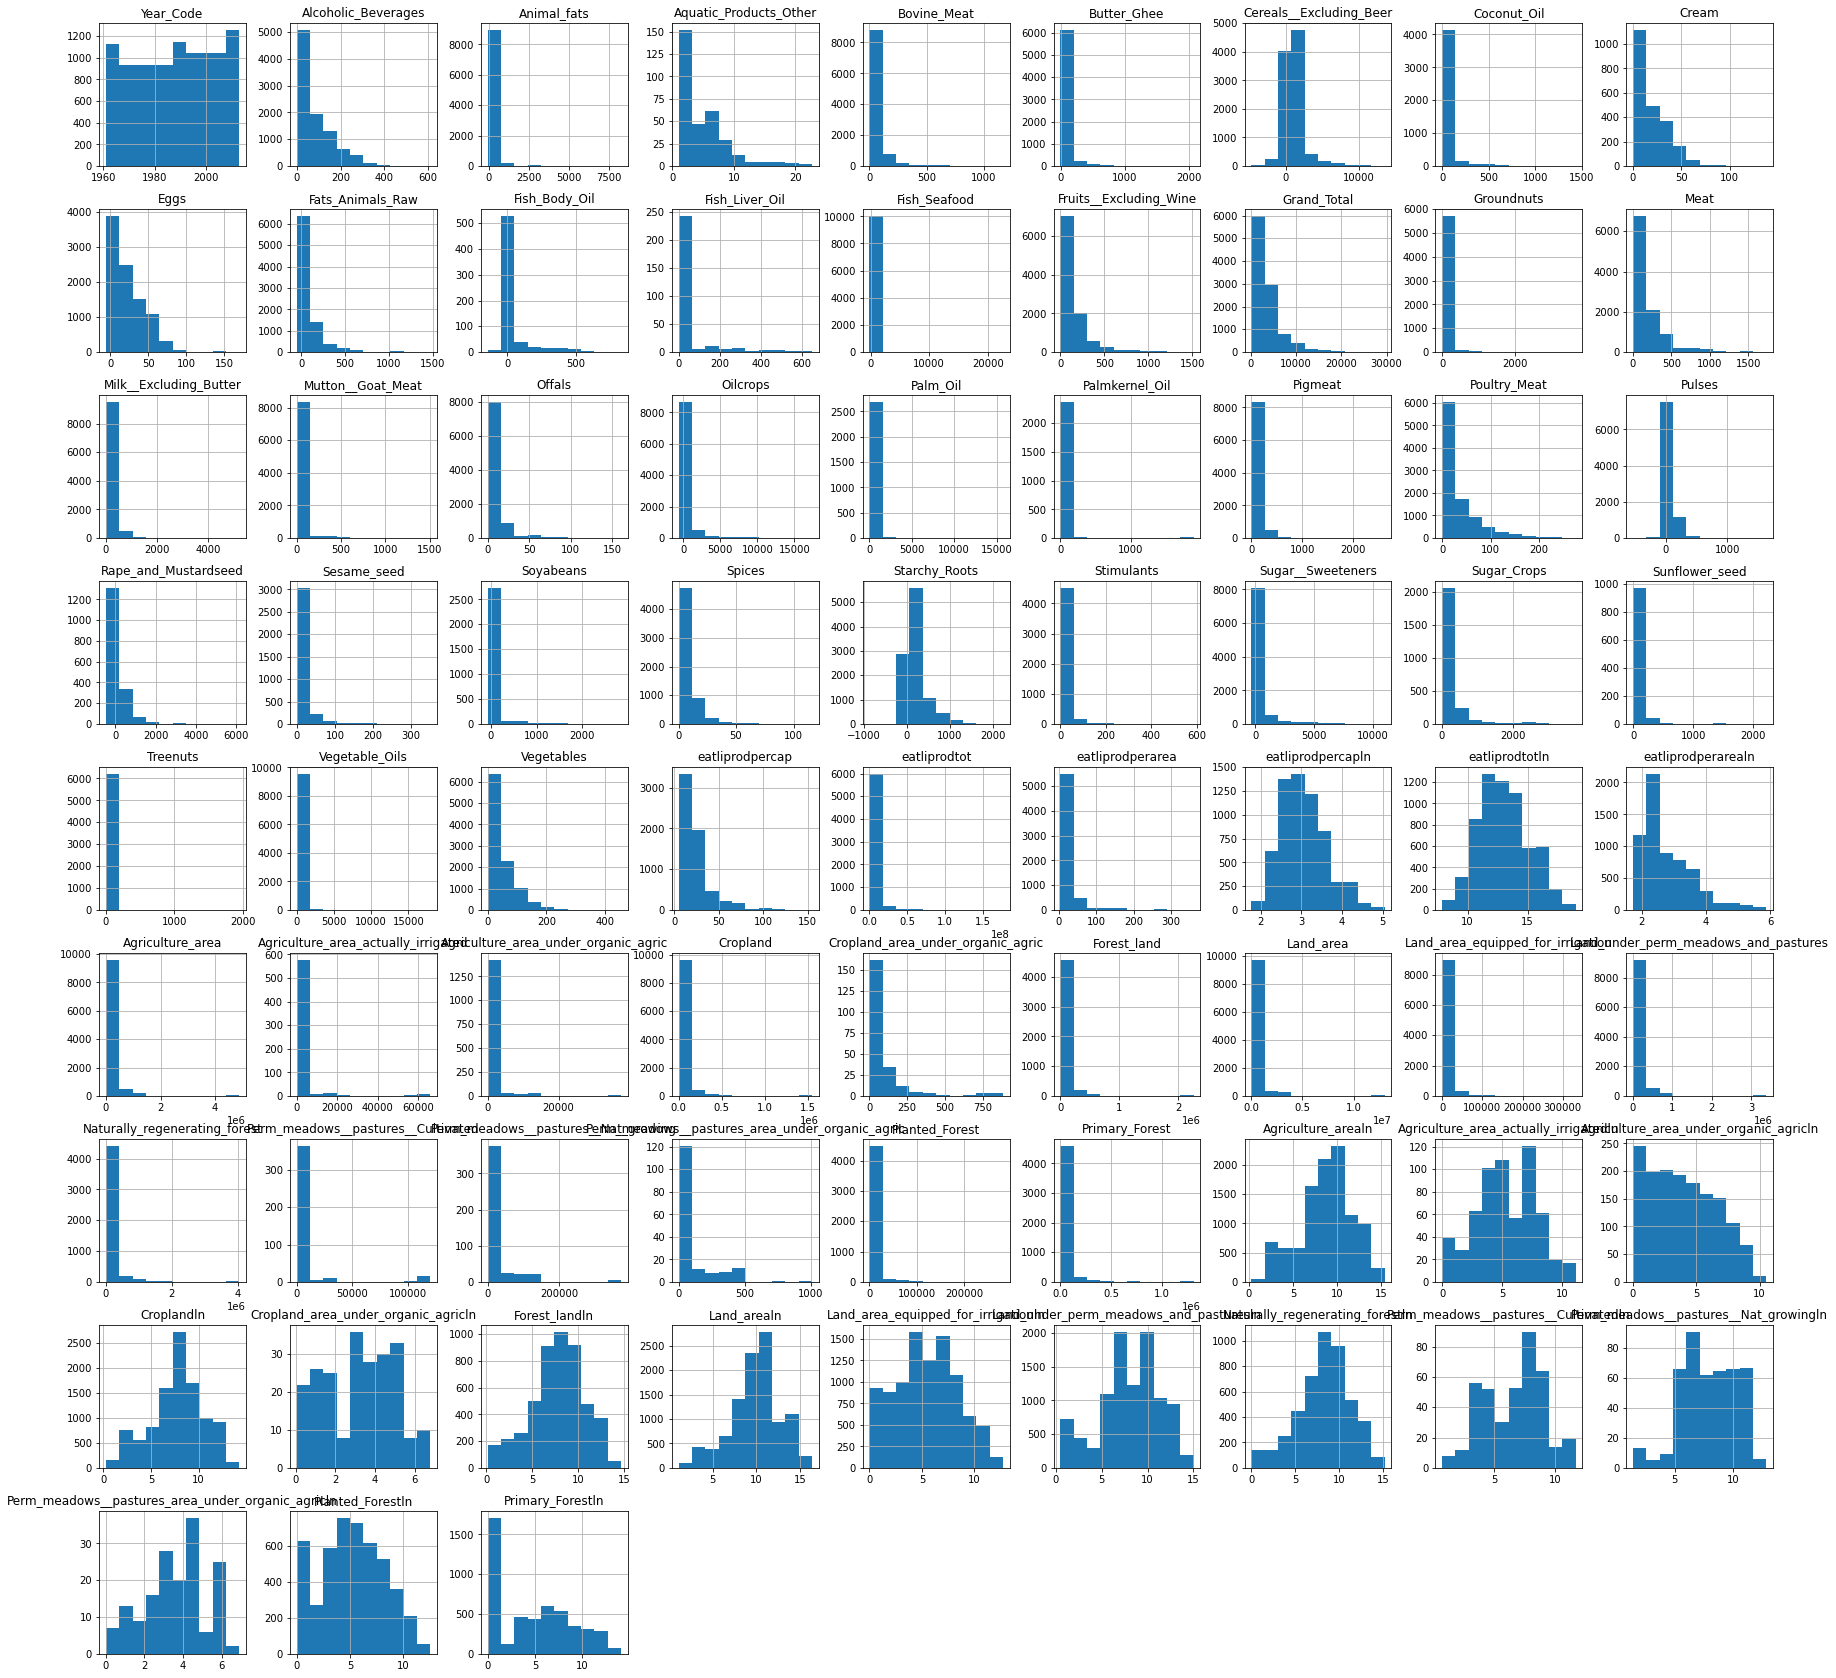

In [138]:
hists = plt.figure(figsize = (30,30))  # Size of the figure
ax = hists.gca()                                
fbs_pivot_cal_to_tonneeatlifinal.hist(ax = ax)         # draw a histogram based on the dataset
plt.show()

In [146]:
fbs_pivot_cal_to_tonneeatlifinal_nona = fbs_pivot_cal_to_tonneeatlifinal.dropna(subset=['eatliprodpercap',
                                                                                        'Agriculture_area',
                                                                                        'Cropland','Forest_land','Land_area',
                                                                                        'Land_area_equipped_for_irrigation',
                                                                                        'Land_under_perm_meadows_and_pastures',
                                                                                        'Naturally_regenerating_forest',
                                                                                        'Planted_Forest','Primary_Forest'])
fbs_pivot_cal_to_tonneeatlifinal_nona = fbs_pivot_cal_to_tonneeatlifinal_nona.reset_index(drop=True)

In [154]:
import statsmodels.formula.api as sm
result = sm.ols(formula="eatliprodtotln ~ Agriculture_arealn + Croplandln + Forest_landln + Land_arealn + Land_area_equipped_for_irrigationln + Land_under_perm_meadows_and_pasturesln + Naturally_regenerating_forestln + Planted_Forestln + Primary_Forestln",data=fbs_pivot_cal_to_tonneeatlifinal_nona).fit()
print(result.params)
print(result.summary())

Intercept                                 6.858273
Agriculture_arealn                        0.084691
Croplandln                                0.616975
Forest_landln                             0.711315
Land_arealn                              -0.479887
Land_area_equipped_for_irrigationln       0.177927
Land_under_perm_meadows_and_pasturesln    0.060524
Naturally_regenerating_forestln          -0.401014
Planted_Forestln                          0.142351
Primary_Forestln                         -0.002005
dtype: float64
                            OLS Regression Results                            
Dep. Variable:         eatliprodtotln   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     3271.
Date:                Sun, 15 May 2022   Prob (F-statistic):               0.00
Time:                        03:18:47   Log-Likelihood:                -2906.7
N